<a href="https://colab.research.google.com/github/peculab/PythonAI4Beginners/blob/main/%E7%AC%AC%E4%B9%9D%E9%80%B1_%E7%B0%A1%E5%96%AE%E7%9A%84%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8%E6%A8%A1%E5%9E%8B_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

用 matplotlib 繪製一條從點 (0, 1.97) 到 (25, 26.37) 的直線。
- color='k': 這裡的 k 代表黑色。
- linestyle='-': 這表示使用實線。
- linewidth=2: 線的寬度為 2。

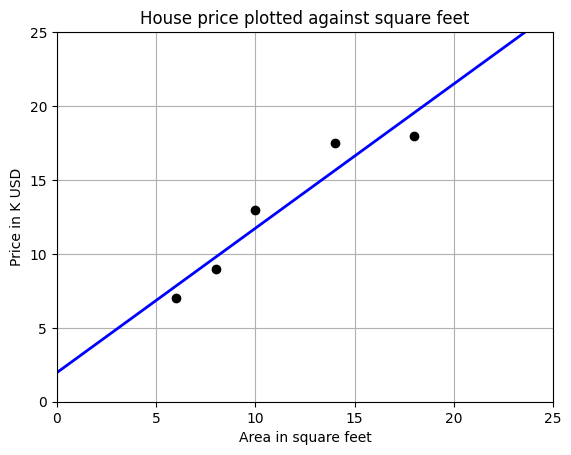

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y = [7, 9, 13, 17.5, 18]

plt.figure()
plt.title('House price plotted against square feet')
plt.xlabel('Area in square feet')
plt.ylabel('Price in K USD')
plt.plot(X, y, 'ko')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.plot([0, 25], [1.97, 26.37], color='b', linestyle='-', linewidth=2)
plt.show()

# 這條線該怎麼畫？
- 憑感覺？


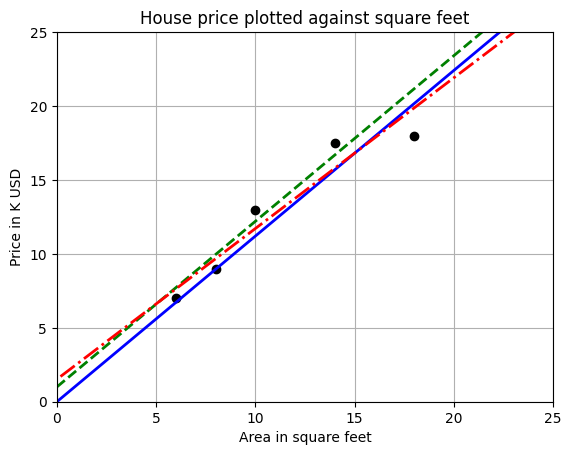

In [ ]:
plt.figure()
plt.title('House price plotted against square feet')
plt.xlabel('Area in square feet')
plt.ylabel('Price in K USD')
plt.plot(X, y, 'ko')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.plot([0, 25], [0, 28], color='b', linestyle='-', linewidth=2)
plt.plot([0, 25], [1, 29], color='g', linestyle='--', linewidth=2)
plt.plot([-1, 25], [0.5, 27], color='r', linestyle='-.', linewidth=2)
plt.show()

## 模型訓練方法
### 求解「簡單線性迴歸的普通最小平方法(OLS)」
- 「簡單線性迴歸」由方程式y=wx+b給出,而我們的目標是透過求「成本函數的極小值」來求解出w和的值。
- 首先我們將解出w值,為了達到目的,我們將計算x的變異數(variance)以及x和y的共變異數(covariance)。
- 變異數用來衡量一組值的「偏離」程度,如果集合中的所有數值都相等,那麼這組值的變異數為0。
- 變異數「小」意味著這組值都很「接近」總體平均值,而如果集合中包含偏離「平均值」很遠的資料,則集合會有「很大的變異數」。
- 變異數可以使用下面的公式計算出來:

In [ ]:
import numpy as np

X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
x_bar = X.mean()
print("x_bar:", x_bar)

# Note that we subtract one from the number of training instances when calculating the sample variance.
# This technique is called Bessel's correction. It corrects the bias in the estimation of the population variance
# from a sample.
variance = ((X - x_bar)**2).sum() / (X.shape[0] - 1)
print("variance:",variance)
#print(np.var(X, ddof=1)) #快速算法，用內建函式一行搞定，可以驗算

# We previously used a List to represent y.
# Here we switch to a NumPy ndarray, which provides a method to calulcate the sample mean.
y = np.array([7, 9, 13, 17.5, 18])

y_bar = y.mean()
# We transpose X because both operands must be row vectors
covariance = np.multiply((X - x_bar).transpose(), y - y_bar).sum() / (X.shape[0] - 1)
print("covariance:", covariance)
#print(np.cov(X.transpose(), y)[0][1]) #快速算法，用內建函式一行搞定，可以驗算
beta = covariance/variance
print("beta:",beta)

alpha = y_bar - beta * x_bar
print("alpha:",alpha)

print('A 11 ft² house should cost: $%.2fK USD' % (alpha + beta * 11))
print('A 18 ft² house should cost: $%.2fK USD' % (alpha + beta * 18))

x_bar: 11.2
variance: 23.2
covariance: 22.65
beta: 0.9762931034482758
alpha: 1.9655172413793114
A 11 ft² house should cost: $12.70K USD
A 18 ft² house should cost: $19.54K USD


# 使用Sciket learn 簡化
- sciken learn 三件套

In [ ]:
from sklearn.linear_model import LinearRegression
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y = [7, 9, 13, 17.5, 18]

# Create an instance of the estimator, LinearRegression
model = LinearRegression()
# Fit the model on the training data
model.fit(X, y)

# Predict the price of a house with a ft sq that has never been seen before
test_house = np.array([[11]])
predicted_price = model.predict(test_house)[0]
print('A 11 ft² house should cost: $%.2fK USD' % predicted_price)

test_house = np.array([[18]])
predicted_price = model.predict(test_house)[0]
print('A 18 ft² house should cost: $%.2fK USD' % predicted_price)

#print('Residual sum of squares: %.2f' % np.mean((model.predict(X) - y) ** 2))

A 11 ft² house should cost: $12.70K USD
A 18 ft² house should cost: $19.54K USD


# R-squared


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 訓練和測試資料
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = [7, 9, 13, 17.5, 18]

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = [11, 8.5, 15, 18, 11] #測試資料的答案，可以和預測出來的結果比較，用於評估準確率用

# 建立並訓練模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測測試集的 y 值
y_pred = model.predict(X_test)

# 計算 SStot（總變異平方和）
y_mean = np.mean(y_test)
SStot = np.sum((y_test - y_mean) ** 2)
#SStot = (11 - 12.7)² + (8.5 - 12.7)² + ... + (11 - 12.7)² = 56.8

# 計算 SSres（殘差平方和）
SSres = np.sum((y_test - y_pred) ** 2)
#SSres = (11 - 9.78)² + (8.5 - 10.75)² + ... + (11 - 13.68)² ≈ 19.20

# 計算 R-squared
R_squared = 1 - (SSres / SStot)
# R² = 1 - 19.20 / 56.8 ≈ 0.66

print("SStot:", SStot)
print("SSres:", SSres)
print("R-squared:", R_squared)


SStot: 56.8
SSres: 19.1980993608799
R-squared: 0.6620052929422553


# 使用函式快速計算

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = [7, 9, 13, 17.5, 18]

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = [11, 8.5, 15, 18, 11]

r_squared = model.score(X_train, y_train)
print("Training R-squared:", r_squared)

model = LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_test, y_test)
print("Testing R-squared:", r_squared)

Training R-squared: 0.9100015964240102
Testing R-squared: 0.6620052929422553
